f(𝑥0 ,𝑥1)=𝑥0^2 + 𝑥1^2의 Gradient descent 과정을
2차원 평면에 표현하시오.

In [3]:
# coding: utf-8
import os, sys
print(os.getcwd())

import numpy as np
import matplotlib.pylab as plt

c:\Users\USER\ms-deep-learning\deep-learning\notebooks\deep-learning-basic\ch03-neural-network-training


In [4]:
# 2차원 - 수치미분 원소 함수
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x) #x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    
    return grad

# 수치 미분
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else: 
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

In [5]:
# 경사하강법 함수
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x
    x_history = []
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)

# 미분 전 원래 함수
def function_2(x):
    return x[0]**2 + x[1]**2

[[-3.          4.        ]
 [ 2.4        -3.2       ]
 [-1.92        2.56      ]
 [ 1.536      -2.048     ]
 [-1.2288      1.6384    ]
 [ 0.98304    -1.31072   ]
 [-0.786432    1.048576  ]
 [ 0.6291456  -0.8388608 ]
 [-0.50331648  0.67108864]
 [ 0.40265318 -0.53687091]
 [-0.32212255  0.42949673]
 [ 0.25769804 -0.34359738]
 [-0.20615843  0.27487791]
 [ 0.16492674 -0.21990233]
 [-0.1319414   0.17592186]
 [ 0.10555312 -0.14073749]
 [-0.08444249  0.11258999]
 [ 0.06755399 -0.09007199]
 [-0.0540432   0.07205759]
 [ 0.04323456 -0.05764608]]


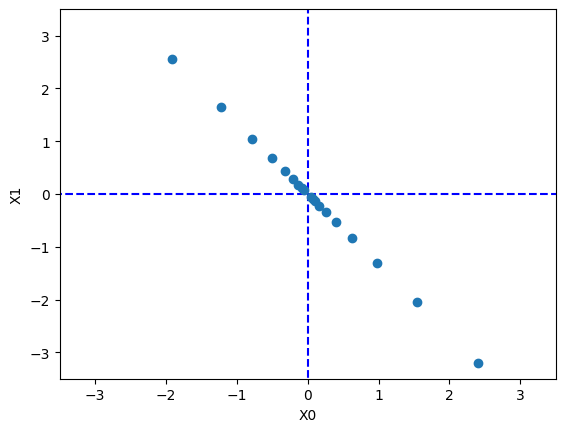

In [28]:
init_x = np.array([-3.0, 4.0])
lr = 0.9 # 학습률
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

print(x_history)
plt.plot( [-5,5], [0,0], '--b')
plt.plot( [0,0], [-5,5], '--b')
plt.plot(x_history[:, 0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [25]:
type(x_history)

numpy.ndarray

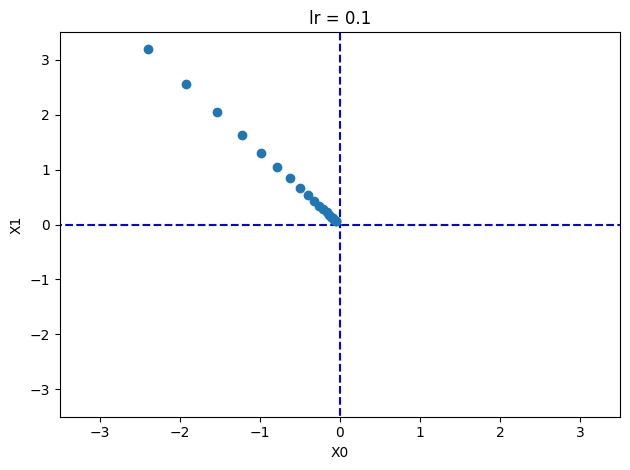

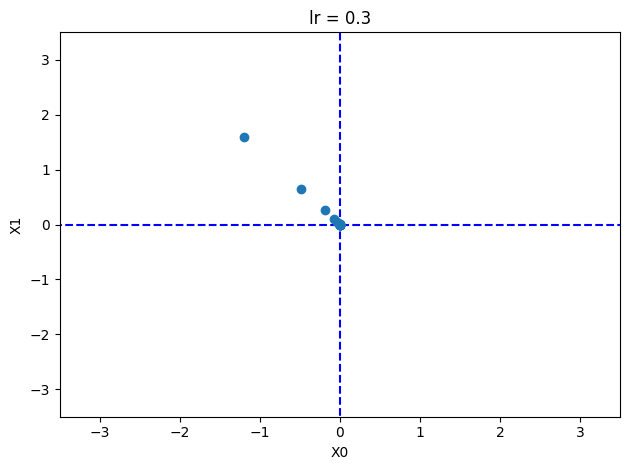

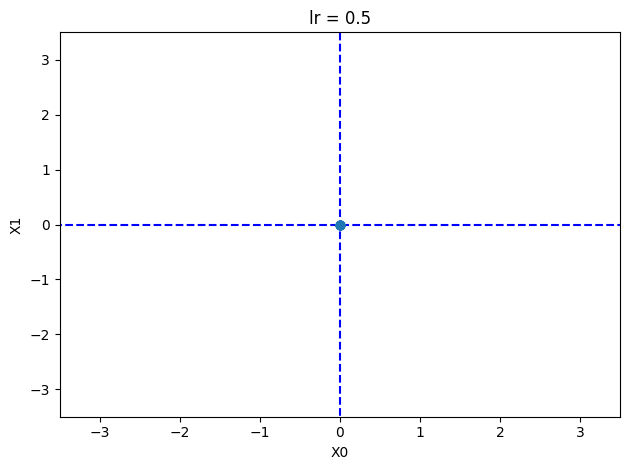

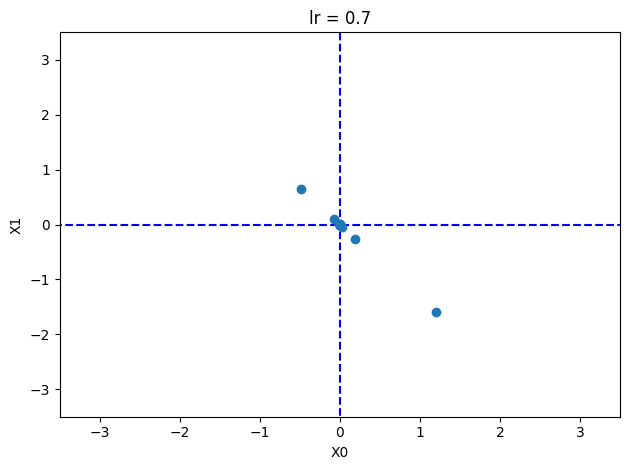

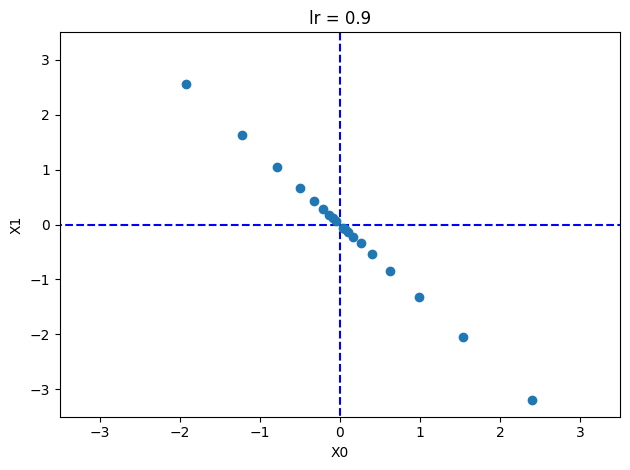

In [30]:
# 학습률에 따라서 plot 그려보기 
init_x = np.array([-3.0, 4.0])
lr = [0.1, 0.3, 0.5, 0.7, 0.9]
step_num = 20

for r in lr:
    x, x_history = gradient_descent(function_2, init_x.copy(), lr=r, step_num=step_num)
    plt.plot( [-5,5], [0,0], '--b')
    plt.plot( [0,0], [-5,5], '--b')
    plt.plot(x_history[:, 0], x_history[:,1], 'o')

    plt.xlim(-3.5, 3.5)
    plt.ylim(-3.5, 3.5)
    plt.title(f'lr = {r}')
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.tight_layout()
    plt.show()